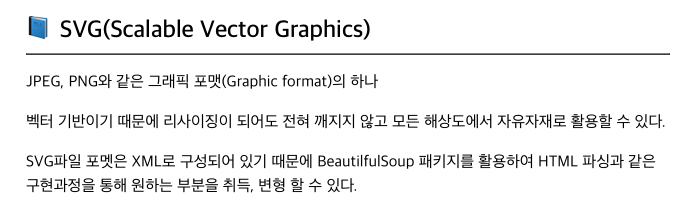

### #01. 준비작업

1) 패키지 참조
- bs4패키지가 필요
- 웹 페이지 데이터 수집 단원을 통해 이미 설치되어 있음


In [24]:
from hossam import load_data
from IPython.display import SVG
from bs4 import BeautifulSoup
from pandas import DataFrame
import numpy as np
import os

In [73]:
origin = load_data("senior_lsf")
origin

[data] https://data.hossam.kr/data/lab06/senior_lsf.xlsx
[desc] 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터
[!] Cannot read metadata


,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


### #02. 지도 이미지 가져오기

위키미디어에서 Seoul districts.svg 키워드로 검색하여 서울 지도 이미지를 내려받아 map_seoul.svg라는 이름으로 작업 폴더에 추가하고 open() 함수로 파일을 읽어올 수 있다.

https://commons.wikimedia.org/wiki/File:Seoul_districts.svg?uselang=ko

혹은 아래의 URL에 접속한 후 Ctrl+s를 눌러서 파일을 저장한다.

https://data.hossam.kr/data/lab07/map_seoul.svg

저장된 파일은 /작업폴더/svg/map_seoul.svg 경로에 저장한다.

In [26]:
# 지도 이미지 읽어오기
map_file_path = "svg/map_seoul.svg"

try:
    with open(map_file_path, 'r', encoding='utf-8')as f:
        map_svg = f.read()
    print("파일 읽어오기 완료")
except Exception as e:
    print("파일 읽어오기 에러:", e)

파일 읽어오기 완료


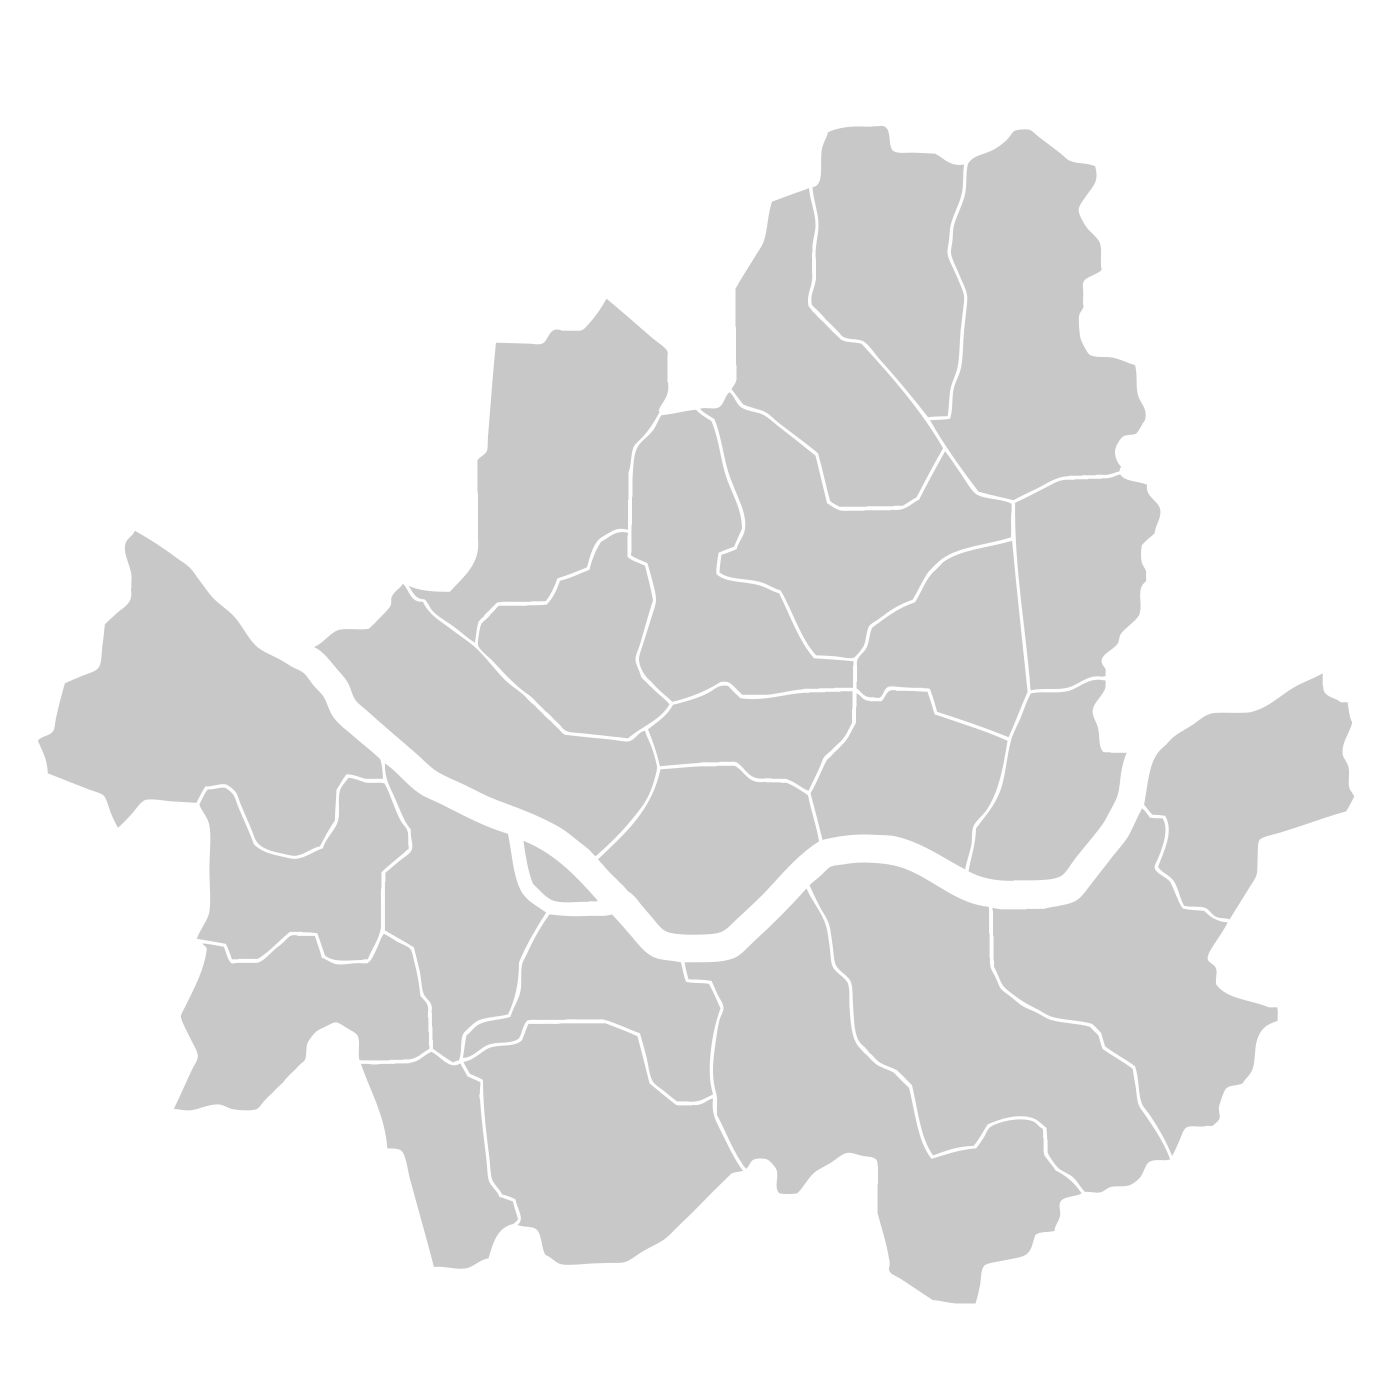

In [27]:
SVG(map_svg)

### #03. 데이터 시각화
1) 단계별 색상 팔레트 만들기

단계는 분석가가 임의로 정한다.

색상값을 1단계 ~ 높은 단계 순으로 점점 진한 색상이 되도록 구성

In [28]:
colors = ['#f1eef6', '#bdc9e1', '#74a9cf', '#2b8cbe', '#045a8d', '#023858']  # 연한색 ~ 진한색


2) BeautifulSoup 객체 생성
- svg파일의 내용을 BeautifulSoup객체로 변환

In [29]:
soup = BeautifulSoup(map_svg, features="xml")
# soup

[3] 구 단위로 추출

id속성을 갖는 path 태그 가져오기

In [64]:
#soup.select() 메서드의 리턴값은 항상 리스트이다.
# -> path 태그이면서 id 속성을 갖는 요소를 리스트로 변환
# <path id="???" ...>
path_list = soup.select('path[id]')
print("가져온 도형의 수: ", len(path_list))

가져온 도형의 수:  25


[3] 지도에서 확인한 지역명 수 만큼 반복

In [74]:
for p in path_list:
    지역명 = p['id'] 
    복지시설수=origin.query('지역명==@지역명')['복지시설'].values[0]
    print(지역명)
    if 복지시설수>250: color_index =5
    elif 복지시설수>200: color_index =4
    elif 복지시설수>150: color_index =3
    elif 복지시설수>100: color_index =2
    elif 복지시설수>50: color_index =1
    else: color_index =0
    p['fill'] = colors[color_index]

Dobong-gu
Dongdaemun-gu
Dongjak-gu
Eunpyeong-gu
Gangbuk-gu
Gangdong-gu
Gangseo-gu
Geumcheon-gu
Guro-gu
Gwanak-gu
Gwangjin-gu
Gangnam-gu
Jongno-gu
Jung-gu
Jungnang-gu
Mapo-gu
Nowon-gu
Seocho-gu
Seodaemun-gu
Seongbuk-gu
Seongdong-gu
Songpa-gu
Yangcheon-gu
Yeongdeungpo-gu
Yongsan-gu


[4] 재구성된 내용을 토대로 새로운 svg 소스코드 얻기

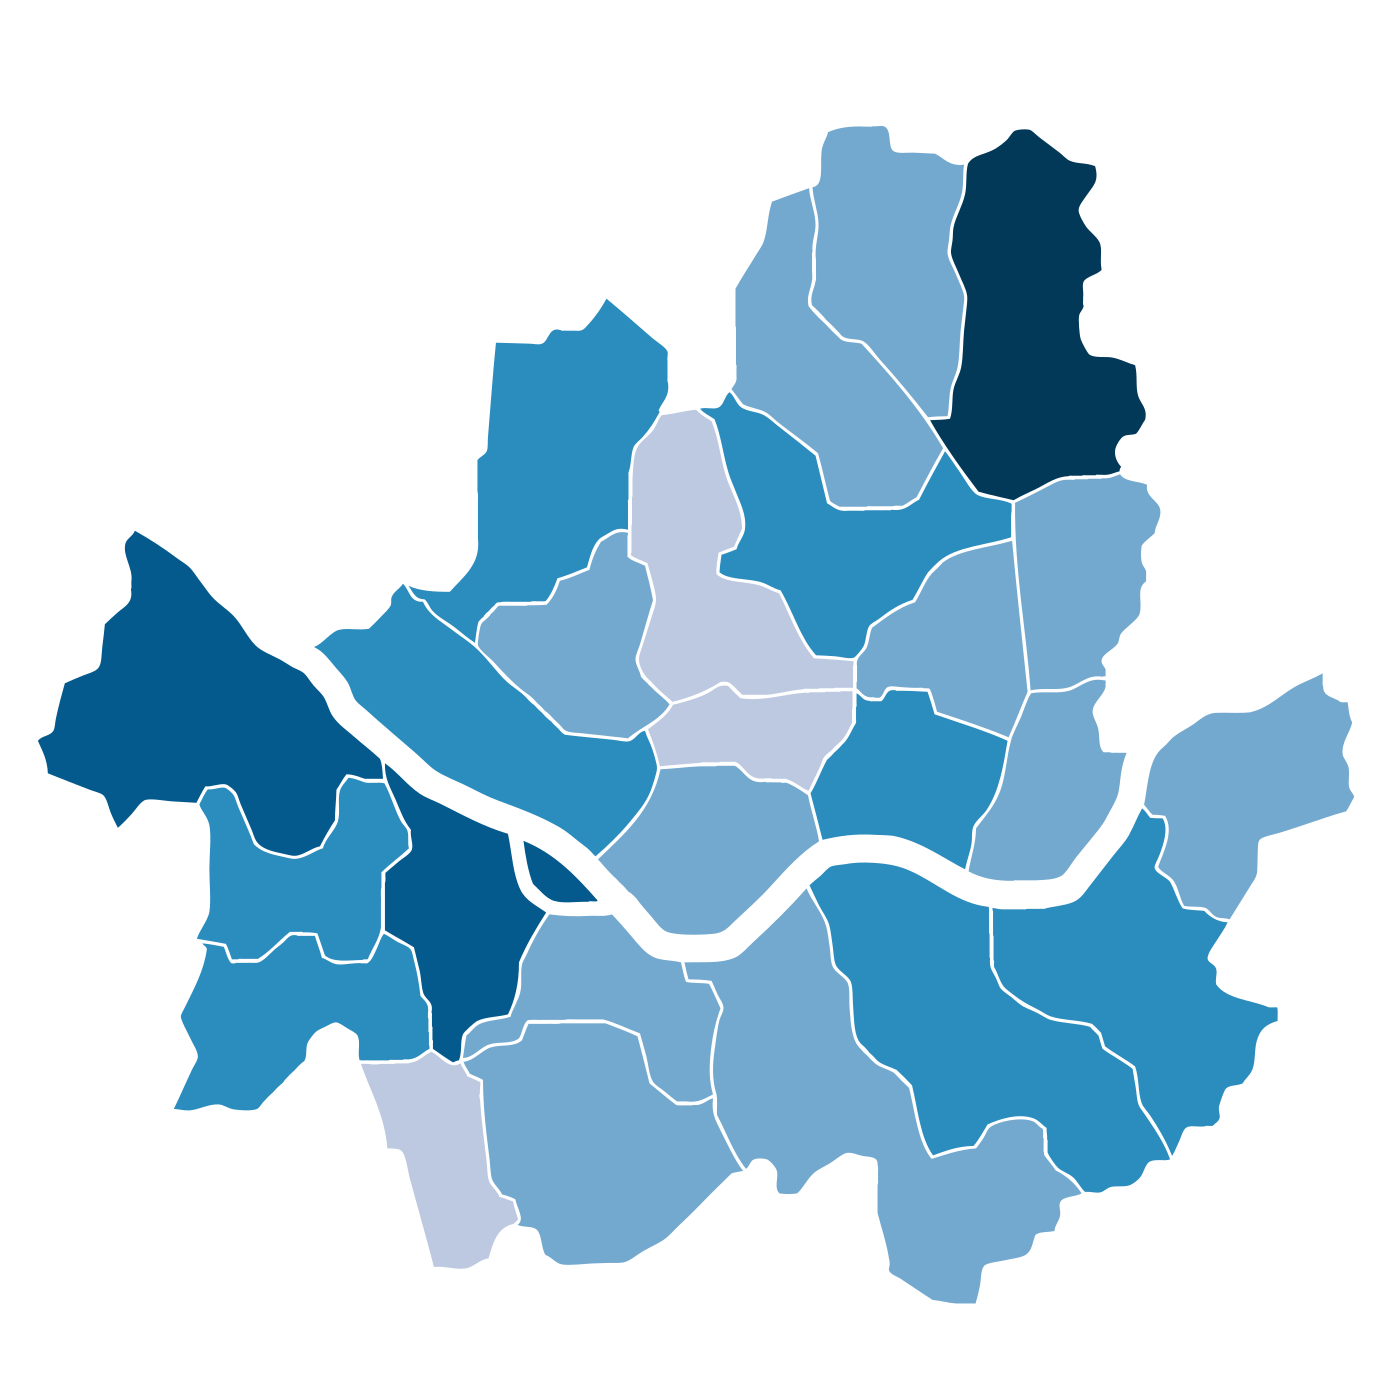

In [12]:
# bs4 객체의 내용을 문자열로 리턴
new_seoul_svg = soup.prettify()

#jupyter notebook에서 svg 출력
# 사용 방법 -> SVG(소스문자열) 혹은 SVG(파일경로)
SVG(new_seoul_svg)

[5] 생성된 이미지를 파일로 저장해야 하는 경우

In [13]:
# 저장된 파일은 윈도우 폴더창에서 직접 더블클릭 열어서 확인 가능
with open('svg/new_seoul_map.svg', 'w', encoding='utf-8') as f:
    f.write(new_seoul_svg)

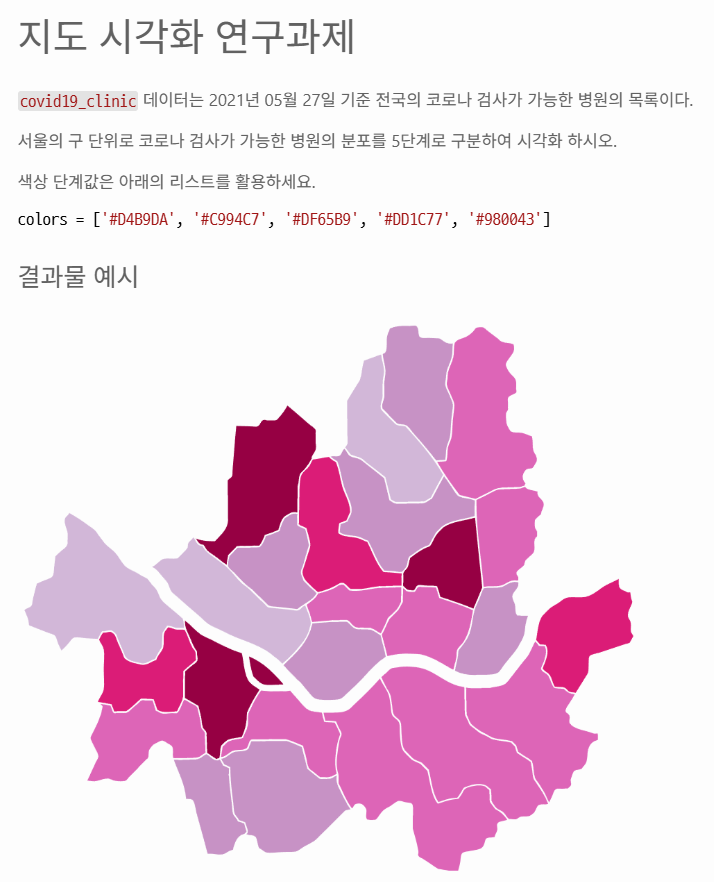

In [116]:
origin = load_data("covid19_clinic")
origin

[data] https://data.hossam.kr/data/lab07/covid19_clinic.xlsx
[desc] 서울시의 Covid19 검진 가능 진료소 데이터 (출처: 공공데이터 포털)
[!] Cannot read metadata


,시도,시군구,의료기관명,주소
0,서울,강남구,강남구보건소,서울 강남구 삼성동(삼성2동) 8 강남구보건소
1,서울,강남구,삼성서울병원,서울 강남구 일원로81 삼성서울병원
2,서울,강남구,강남세브란스병원,서울 강남구 언주로211 강남세브란스병원
3,서울,강동구,강동구보건소,서울 강동구 성내동 541-2
4,서울,강동구,중앙보훈병원,서울 강동구 진황도로 61길 53
...,...,...,...,...
621,제주,제주시,한마음병원,연신로 52
622,제주,제주시,한국병원,서광로 193
623,제주,제주시,중앙병원,월랑로 91
624,제주,제주시,제주시(동부보건소),제주 제주시 구좌읍 김녕리 1697-1 동부보건소 동부보건소


In [117]:
# 시도가 서울인 데이터만 추출
df = origin.query('시도=="서울"')
df

,시도,시군구,의료기관명,주소
0,서울,강남구,강남구보건소,서울 강남구 삼성동(삼성2동) 8 강남구보건소
1,서울,강남구,삼성서울병원,서울 강남구 일원로81 삼성서울병원
2,서울,강남구,강남세브란스병원,서울 강남구 언주로211 강남세브란스병원
3,서울,강동구,강동구보건소,서울 강동구 성내동 541-2
4,서울,강동구,중앙보훈병원,서울 강동구 진황도로 61길 53
...,...,...,...,...
66,서울,종로구,서울적십자병원,서울시 종로구 평동 164
67,서울,종로구,서울대학교병원,서울시 종로구 대학로 101(연건동)
68,서울,중랑구,중랑구보건소,서울 중랑구 신내2동 662 중랑구청
69,서울,중랑구,서울의료원,중랑구 신내로 156


In [121]:
# Dobong-gu ,Dongdaemun-gu, Dongjak-gu, Eunpyeong-gu, Gangbuk-gu, Gangdong-gu
#Gangseo-gu, Geumcheon-gu, , Guro-gu, Gwanak-gu, Gwangjin-gu, Gangnam-gu, Jongno-gu
# Jung-gu, Jungnang-gu, Mapo-gu, Nowon-gu, Seocho-gu, Seodaemun-gu, Seongbuk-gu, Seongdong-gu
# Songpa-gu, Yangcheon-gu,Yeongdeungpo-gu, Yongsan-gu, 
df2 = df.groupby('시군구')['시군구'].count().reset_index(name='의료기관수')
df2.sort_values('의료기관수', ascending=False)

# 시군구 영어로 변환 - svg 파일이 영어로 돼있음
sido = {
    '강남구' : 'Gangnam-gu', '강동구' : 'Gangdong-gu', '강북구' : 'Gangbuk-gu',
    '강서구' : 'Gangseo-gu', '관악구' : 'Gwanak-gu',  '광진구' : 'Gwangjin-gu',
    '구로구' : 'Guro-gu', '금천구' : 'Geumcheon-gu', '노원구' : 'Nowon-gu','도봉구' : 'Dobong-gu',
    '동대문구' : 'Dongdaemun-gu','동작구' : 'Dongjak-gu','마포구' : 'Mapo-gu','서대문구' : 'Seodaemun-gu',
    '서초구' : 'Seocho-gu','성동구' : 'Seongdong-gu','성북구' : 'Seongbuk-gu','송파구' : 'Songpa-gu',
    '양천구' : 'Yangcheon-gu','영등포구' : 'Yeongdeungpo-gu','용산구' : 'Yongsan-gu', '은평구' : 'Eunpyeong-gu',
    '종로구' : 'Jongno-gu', '중구' : 'Jung-gu', '중랑구' : 'Jungnang-gu'
}
df2['시군구'] = df2['시군구'].map(sido)
df2
# 시군구를 인덱스로
df2 = df2.set_index('시군구')
df2

,의료기관수
시군구,
Gangnam-gu,3
Gangdong-gu,4
Gangbuk-gu,1
Gangseo-gu,1
Gwanak-gu,2
Gwangjin-gu,2
Guro-gu,3
Geumcheon-gu,2
Nowon-gu,3


In [91]:
colors = ['#D4B9DA', '#C994C7','#DF65B9','#DD1C77','#980043']  # 연한색 ~ 진한색

In [79]:
# 지도 이미지 읽어오기
map_file_path = "svg/map_seoul.svg"

try:
    with open(map_file_path, 'r', encoding='utf-8')as f:
        map_svg = f.read()
    print("파일 읽어오기 완료")
except Exception as e:
    print("파일 읽어오기 에러:", e)

파일 읽어오기 완료


In [80]:
soup = BeautifulSoup(map_svg, features="xml")
# soup

In [81]:
#soup.select() 메서드의 리턴값은 항상 리스트이다.
# -> path 태그이면서 id 속성을 갖는 요소를 리스트로 변환
# <path id="???" ...>
path_list = soup.select('path[id]')
print("가져온 도형의 수: ", len(path_list))

가져온 도형의 수:  25


In [90]:
print(df2.query('시군구=="Gangnam-gu"')['의료기관수'].values[0])

3


In [123]:
for p in path_list:
    시군구 = p['id'] 
    의료기관수=df2.query('시군구==@시군구')['의료기관수'].values[0]
    print(시군구, 의료기관수)
    if 의료기관수>4: color_index =4
    elif 의료기관수>3: color_index =3
    elif 의료기관수>2: color_index =2
    elif 의료기관수>1: color_index =1
    else: color_index =0
    p['fill'] = colors[color_index]

Dobong-gu 2
Dongdaemun-gu 5
Dongjak-gu 3
Eunpyeong-gu 5
Gangbuk-gu 1
Gangdong-gu 4
Gangseo-gu 1
Geumcheon-gu 2
Guro-gu 3
Gwanak-gu 2
Gwangjin-gu 2
Gangnam-gu 3
Jongno-gu 4
Jung-gu 3
Jungnang-gu 3
Mapo-gu 1
Nowon-gu 3
Seocho-gu 3
Seodaemun-gu 2
Seongbuk-gu 2
Seongdong-gu 3
Songpa-gu 3
Yangcheon-gu 4
Yeongdeungpo-gu 5
Yongsan-gu 2


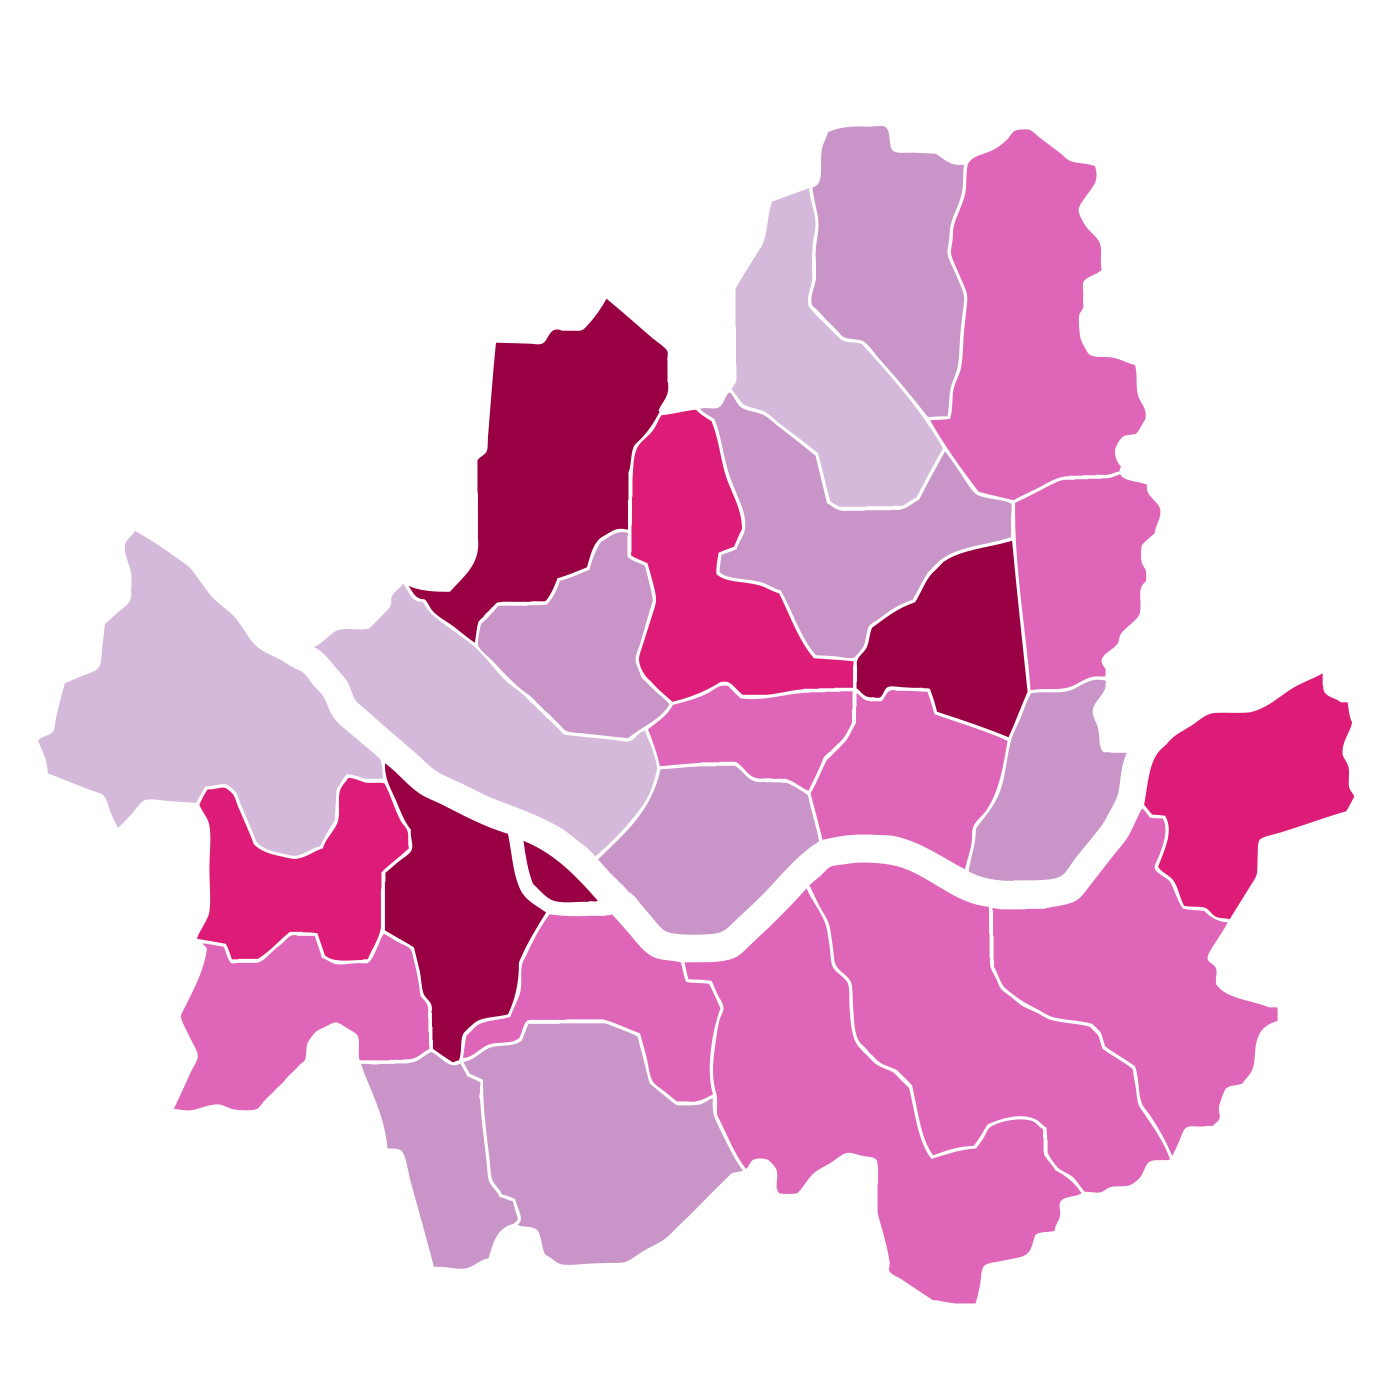

In [87]:
# bs4 객체의 내용을 문자열로 리턴
new_seoul_svg = soup.prettify()

#jupyter notebook에서 svg 출력
# 사용 방법 -> SVG(소스문자열) 혹은 SVG(파일경로)
SVG(new_seoul_svg)

In [ ]:
with open('svg/new_seoul_clinic_map.svg', 'w', encoding='utf-8') as f:
    f.write(new_seoul_svg)

In [93]:
df3 = df2.sort_values('의료기관수', ascending=False)
df3.head()

,시군구,의료기관수
10,Dongdaemun-gu,5
19,Yeongdeungpo-gu,5
21,Eunpyeong-gu,5
22,Jongno-gu,4
18,Yangcheon-gu,4


In [107]:
# 의료기관수가 가장 많은 구의 병원 주소는?
df4 = df3.head(1).iloc[0]
df4['시군구'] = df4['시군구'].replace('Dongdaemun-gu', '동대문구')
origin[origin['시군구']==df4['시군구']]

,시도,시군구,의료기관명,주소
23,서울,동대문구,동대문구보건소,서울 동대문구 용두동 39-9
24,서울,동대문구,삼육서울병원,서울 동대문구 망우로 82
25,서울,동대문구,서울특별시동부병원,서울 동대문구 무학로 124
26,서울,동대문구,서울성심병원,서울 동대문구 왕산로 259
27,서울,동대문구,경희의료원,서울 동대문구 경희대로 23


In [95]:
origin.head()

,시도,시군구,의료기관명,주소
0,서울,강남구,강남구보건소,서울 강남구 삼성동(삼성2동) 8 강남구보건소
1,서울,강남구,삼성서울병원,서울 강남구 일원로81 삼성서울병원
2,서울,강남구,강남세브란스병원,서울 강남구 언주로211 강남세브란스병원
3,서울,강동구,강동구보건소,서울 강동구 성내동 541-2
4,서울,강동구,중앙보훈병원,서울 강동구 진황도로 61길 53


`jenkspy` 패키지 설치가 필요
- 1차원 데이터에 대한 k-means와 같은 알고리즘으로 작동
1. 그룹의 갯수와 각 그룹의 중심값을 임의로 정함
2. 각 데이터 별로, 가장 가까운 중심값을 찾아 그룹을 할당
3. 할당된 결과를 가지고 그룹의 중심점을 재계산
4. `2~3`을 반복

### #04 연구과제 강사님 답안

In [135]:
# 연구 과제 용
import jenkspy
bins = jenkspy.jenks_breaks(df2['의료기관수'], n_classes=5)
bins

[np.int64(1), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

In [136]:
# 지도 이미지 읽어오기
map_file_path = "svg/map_seoul.svg"

try:
    with open(map_file_path, 'r', encoding='utf-8')as f:
        map_svg = f.read()
    print("파일 읽어오기 완료")
except Exception as e:
    print("파일 읽어오기 에러:", e)

파일 읽어오기 완료


In [137]:
colors = ['#D4B9DA', '#C994C7','#DF65B9','#DD1C77','#980043']  # 연한색 ~ 진한색colors
colors

['#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']

In [138]:
soup = BeautifulSoup(map_svg, features="xml")
path_list = soup.select('path[id]')
# soup

In [139]:
for p in path_list:
    시군구 = p['id']
    의료기관수 = df2.loc[시군구, '의료기관수']
    
    for i, v in enumerate(bins):
        if i==0:
            continue
        elif i + 1 < len(bins):
            if 의료기관수 < v:
                color_index = i - 1
                break
        else:
            if 의료기관수 <=v:
                color_index = i - 1
                break
    print(시군구, 의료기관수, color_index)
    p['fill'] = colors[color_index]


Dobong-gu 2 2
Dongdaemun-gu 5 4
Dongjak-gu 3 3
Eunpyeong-gu 5 4
Gangbuk-gu 1 1
Gangdong-gu 4 4
Gangseo-gu 1 1
Geumcheon-gu 2 2
Guro-gu 3 3
Gwanak-gu 2 2
Gwangjin-gu 2 2
Gangnam-gu 3 3
Jongno-gu 4 4
Jung-gu 3 3
Jungnang-gu 3 3
Mapo-gu 1 1
Nowon-gu 3 3
Seocho-gu 3 3
Seodaemun-gu 2 2
Seongbuk-gu 2 2
Seongdong-gu 3 3
Songpa-gu 3 3
Yangcheon-gu 4 4
Yeongdeungpo-gu 5 4
Yongsan-gu 2 2


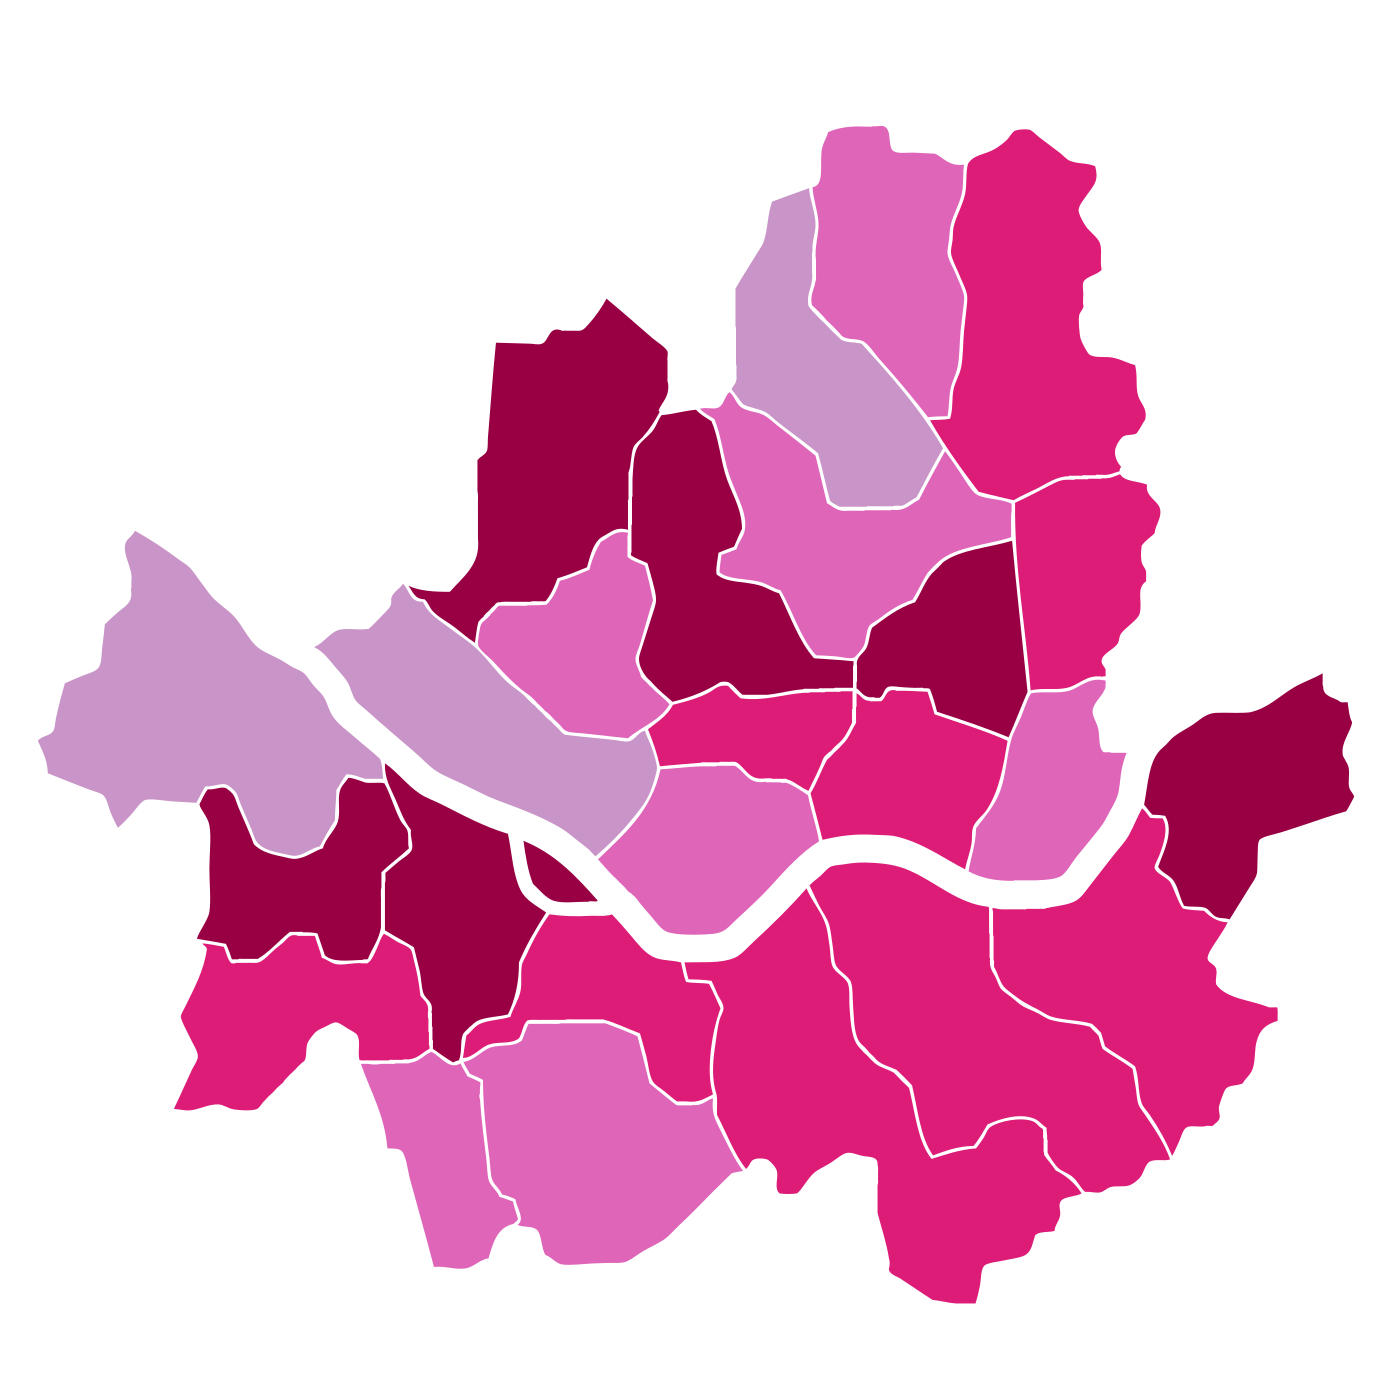

In [140]:
new_seoul_svg = soup.prettify()
SVG(new_seoul_svg)